In [99]:
import pandas as pd

printer_table = pd.DataFrame(data=[
    [1, "Printer1", 8],
    [2, "Printer2", 8],
    [3, "Printer3", 12],
    [4, "Printer4", 12],
], columns=["printer_id", "printer_name", "available_hours"])
display(printer_table)

,printer_id,printer_name,available_hours
0,1,Printer1,8
1,2,Printer2,8
2,3,Printer3,12
3,4,Printer4,12


In [104]:
product_table = pd.DataFrame(data=[
    [1, "Product1"],
    [2, "Product2"],
], columns=["product_id", "product_name"])
display(product_table)

,product_id,product_name
0,1,Product1
1,2,Product2


In [105]:
import random as rn
rn.seed(42)
printer_product_data = []

for print_id, *_ in printer_table.to_numpy():
    for prod_id, *_ in product_table.to_numpy():
        printer_product_data.append({
            "printer_id": print_id,
            "product_id": prod_id,
            "hours_req": rn.randint(1,4),
            "unit_profit": rn.randint(100,400)
        })
    # for
# for

printer_product_table = pd.DataFrame(data=printer_product_data)
display(printer_product_table)

,printer_id,product_id,hours_req,unit_profit
0,1,1,1,112
1,1,2,3,225
2,2,1,2,171
3,2,2,1,379
4,3,1,1,316
5,3,2,1,115
6,4,1,1,211
7,4,2,2,358


In [106]:
# Determine the Objective Function and Decision Variables
# Max Z: p1*x1 + p2*x2 + p3*x3, ... + pNxN
decision_expr = None
constraints = []
for print_id, print_name, avail_hrs in printer_table.to_numpy():
    x = Symbol(f'x{print_id}')
    constraint = None
    for prod_id, prod_name in product_table.to_numpy():
        p = Symbol(prod_name)
        df = printer_product_table
        row = df.where((df['printer_id'] == print_id) & (df['product_id'] == prod_id)).dropna()
        profit = row['unit_profit'].values[0]
        hrs = row['hours_req'].values[0]
        expr = profit*x
        if decision_expr is None:
            decision_expr = expr
        else:
            decision_expr = decision_expr + expr
        if constraint is None:
            constraint = hrs*p
        else:
            constraint = constraint + hrs*p
    # for
    constraint = constraint - hrs
    constraints.append(constraint)
# for
display(decision_expr)

337.0*x1 + 550.0*x2 + 431.0*x3 + 569.0*x4

In [107]:
# Show Constraints
for c in constraints:
    display(c)

1.0*Product1 + 3.0*Product2 - 3.0

2.0*Product1 + 1.0*Product2 - 1.0

1.0*Product1 + 1.0*Product2 - 1.0

1.0*Product1 + 2.0*Product2 - 2.0

In [120]:
# Solve for constraints.
soln = solve(constraints, dict=True)[0]
print(soln.items())

dict_items([(Product1, 0.0), (Product2, 1.00000000000000)])


Lastly, there are contraints for non-zero products defined as:

x<sub>1</sub> >= 0, x<sub>2</sub> >= 0

## Plot the Solution

In [3]:
# Import libraries.
import matplotlib.pyplot as plt
import numpy as np
from sympy import Symbol, solve

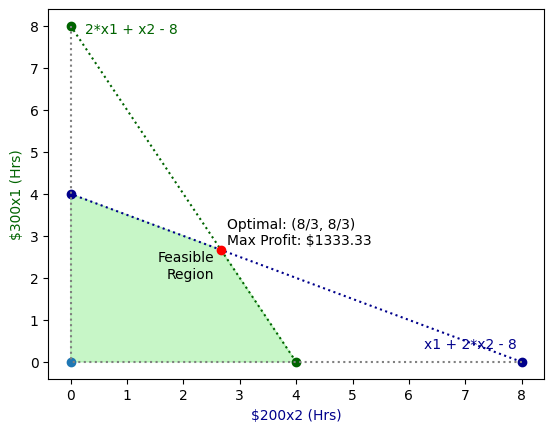

In [6]:
def get_bound(x1, x2, limit):
    x_1 = [limit/x1, 0.0]
    x_2 = [0.0, limit/x2]
    return x_1, x_2


def plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit):
    # Create variables x1 and x2, via SymPy.
    s1 = Symbol('x1')
    s2 = Symbol('x2')

    # Get bounds (points) for constraints.
    x1, y1 = get_bound(b1_x1, b1_x2, max_hrs_x1)
    x2, y2 = get_bound(b2_x1, b2_x2, max_hrs_x2)

    # Define constraint formulas.
    constraint1 = b1_x1*s1 + b1_x2*s2 - max_hrs_x1
    constraint2 = b2_x1*s1 + b2_x2*s2 - max_hrs_x2

    # Solve for constraints.
    soln = solve((constraint1, constraint2), dict=True)[0]
    intersect_x = soln[s1]
    intersect_y = soln[s2]

    # Define objective function.
    max_profit_formula = x1_profit*s1 + x2_profit*s2

    # Final Solution - maximize profit.
    max_profit = float(max_profit_formula.subs({'x1': intersect_x, 'x2': intersect_y}))

    # Plot the first constraint.
    plt.plot(x1, y1, linestyle=':', marker='o', color='darkgreen')
    # Label with constraint formula.
    plt.annotate(
        constraint1,
        (0, max_hrs_x1),
        textcoords="offset points",
        xytext=(10, -5),
        ha='left',
        color='darkgreen'
    )

    # Plot the second constraint.
    plt.plot(x2, y2, linestyle=':', marker='o', color='darkblue')
    # Label with constraint formula.
    plt.annotate(
        constraint2,
        (max_hrs_x2, 0),
        textcoords="offset points",
        xytext=(-70, 10),
        ha='left',
        color='darkblue'
    )

    # Plot bounds for x1 >= 0 and x2 >= 0.
    plt.plot(0,0, marker='o')
    plt.plot([0, 0], [max_hrs_x1, 0], linestyle=':', color='grey')
    plt.plot([max_hrs_x2, 0], [0, 0], linestyle=':', color='grey')

    # Fill Feasible Region
    plt.fill(
        [0, 0, intersect_x, x1[0]],
        [0, y2[1], intersect_y, 0],
        color='lightgreen', alpha=0.5
    )

    # Plot point for maximum profit.
    plt.plot(intersect_x, intersect_y, marker='o', color='red')
    # Plot labels for maximum profit.
    plt.annotate(
        f"Optimal: ({intersect_x}, {intersect_y})\nMax Profit: ${max_profit:0.2f}",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(4,4),
        ha='left')
    plt.annotate(
        "Feasible\nRegion",
        (intersect_x, intersect_y),
        textcoords="offset points",
        xytext=(-5,-20), ha='right'
    )
    # Draw X and Y axis labels.
    plt.xlabel(f"${x2_profit}x2 (Hrs)", color='darkblue')
    plt.ylabel(f"${x1_profit}x1 (Hrs)", color='darkgreen')
    # Render plot.
    plt.show()

# Test our plot.
plot_solution(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit)

## Adding Interactive Controls for 'What-if' Scenarios?

Now suppose the owner would like to easily update the model as time and profits change, and/or they purchase new printers that take less time. We can set up a dashboard of pywidgets to make the plot interactive to address "what-if" scenarios as variables change.

In [5]:
import ipywidgets as widgets

b1_x1_slider = widgets.IntSlider(value=b1_x1, min=1, max=10, step=1, description='B1*x1')
b1_x2_slider = widgets.IntSlider(value=b1_x2, min=1, max=10, step=1, description='B1*x2')
max_hrs_x1_slider = widgets.IntSlider(value=max_hrs_x1, min=1, max=10, step=1, description='Printer 1 Hrs')
x1_profit_slider = widgets.IntSlider(value=x1_profit, min=0, max=1000, setp=10, description='Printer 1 Profit')

b2_x1_slider = widgets.IntSlider(value=b2_x1, min=1, max=10, step=1, description='B2*x1')
b2_x2_slider = widgets.IntSlider(value=b2_x2, min=1, max=10, step=1, description='B2*x2')
max_hrs_x2_slider = widgets.IntSlider(value=max_hrs_x2, min=1, max=10, step=1, description='Printer 2 Hrs')
x2_profit_slider = widgets.IntSlider(value=x2_profit, min=0, max=1000, setp=10, description='Printer 2 Profit')

def compute(b1_x1, b1_x2, max_hrs_x1, x1_profit, b2_x1, b2_x2, max_hrs_x2, x2_profit):
    try:
        plot_solution(b1_x1.value, b1_x2.value, max_hrs_x1.value, x1_profit.value, b2_x1.value, b2_x2.value, max_hrs_x2.value, x2_profit.value)
    except:
        pass

widgets.interactive(
    compute,
    b1_x1=b1_x1_slider,
    b1_x2=b1_x2_slider,
    max_hrs_x1=max_hrs_x1_slider,
    x1_profit=x1_profit_slider,
    b2_x1=b2_x1_slider,
    b2_x2=b2_x2_slider,
    max_hrs_x2=max_hrs_x2_slider,
    x2_profit=x2_profit_slider
)

interactive(children=(IntSlider(value=2, description='B1*x1', max=10, min=1), IntSlider(value=1, description='…